In [1]:
import pandas as pd
import warnings 
warnings.filterwarnings("ignore")

In [2]:
filename = "/Users/thabisomakhathini/Downloads/EV_Registration_Dataset.csv"

In [3]:
 df = pd.read_csv(filename, names = None)

In [4]:
df.head()

,Identifier,City,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,KL8CL6S05E,Tacoma,98407.0,2014,CHEVROLET,SPARK,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,82.0,0.0,27.0,259013639,POINT (-122.5113356 47.29238280000004),BONNEVILLE POWER ADMINISTRATION||CITY OF TACOM...,5.305306e+10
1,JTDKARFP0H,Port Townsend,98368.0,2017,TOYOTA,PRIUS PRIME,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,25.0,0.0,24.0,220589904,POINT (-122.76441969999996 48.11958740000006),BONNEVILLE POWER ADMINISTRATION||PUGET SOUND E...,5.303195e+10
2,JHMZC5F34J,Vashon,98070.0,2018,HONDA,CLARITY,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,47.0,0.0,34.0,109177015,POINT (-122.45867519999996 47.448468700000035),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
3,KMHC65LD0K,Ridgefield,98642.0,2019,HYUNDAI,IONIQ,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,29.0,0.0,18.0,196216282,POINT (-122.74348499999996 45.81886000000003),BONNEVILLE POWER ADMINISTRATION||PUD NO 1 OF C...,5.301104e+10
4,1N4AZ1CP6J,Bremerton,98337.0,2018,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,151.0,0.0,26.0,187956821,POINT (-122.63590499999998 47.570970000000045),PUGET SOUND ENERGY INC,5.303508e+10


In [5]:
import numpy as np

In [6]:
#Replace zero in base price values with nan 
df['Base MSRP'].replace(0.0, np.nan, inplace=True)

In [7]:
# Identify missing values 
missing_data = df.isnull()
missing_data.head(5)

,Identifier,City,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False


In [8]:
#Count missing values per column 
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("") 

Identifier
False    135038
Name: Identifier, dtype: int64

City
False    135030
True          8
Name: City, dtype: int64

Postal Code
False    135030
True          8
Name: Postal Code, dtype: int64

Model Year
False    135038
Name: Model Year, dtype: int64

Make
False    135038
Name: Make, dtype: int64

Model
False    134789
True        249
Name: Model, dtype: int64

Electric Vehicle Type
False    135038
Name: Electric Vehicle Type, dtype: int64

Clean Alternative Fuel Vehicle (CAFV) Eligibility
False    135038
Name: Clean Alternative Fuel Vehicle (CAFV) Eligibility, dtype: int64

Electric Range
False    135037
True          1
Name: Electric Range, dtype: int64

Base MSRP
True     131613
False      3425
Name: Base MSRP, dtype: int64

Legislative District
False    134726
True        312
Name: Legislative District, dtype: int64

Vehicle ID
False    135038
Name: Vehicle ID, dtype: int64

Vehicle Location
False    135028
True         10
Name: Vehicle Location, dtype: int64

Electric Utilit

In [9]:
# Drop missing values  
new_df = df.dropna() 

In [10]:
# Verify if missing values where dropped 
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3419 entries, 49 to 135025
Data columns (total 15 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   Identifier                                         3419 non-null   object 
 1   City                                               3419 non-null   object 
 2   Postal Code                                        3419 non-null   float64
 3   Model Year                                         3419 non-null   int64  
 4   Make                                               3419 non-null   object 
 5   Model                                              3419 non-null   object 
 6   Electric Vehicle Type                              3419 non-null   object 
 7   Clean Alternative Fuel Vehicle (CAFV) Eligibility  3419 non-null   object 
 8   Electric Range                                     3419 non-null   float64
 9   Base 

In [11]:
#Check duplicates 
new_df.duplicated().sum()

0

In [12]:
#Correct Typos 
#get all the unique values in the Clean Alternative Fuel Vehicle (CAFV) Eligibility column
new_df['Clean Alternative Fuel Vehicle (CAFV) Eligibility'].unique()

array(['Clean Alternative Fuel Vehicle Eligible',
       'Not eligible due to low battery range'], dtype=object)

In [13]:
#convert to lower case
new_df['Clean Alternative Fuel Vehicle (CAFV) Eligibility'] = new_df['Clean Alternative Fuel Vehicle (CAFV) Eligibility'].str.capitalize()

In [14]:
new_df['Clean Alternative Fuel Vehicle (CAFV) Eligibility'].unique()

array(['Clean alternative fuel vehicle eligible',
       'Not eligible due to low battery range'], dtype=object)

In [15]:
# Summarize the key statistics for numerical features and 
new_df.describe()

,Postal Code,Model Year,Electric Range,Base MSRP,Legislative District,Vehicle ID,2020 Census Tract
count,3419.000000,3419.000000,3419.000000,3419.000000,3419.000000,3.419000e+03,3.419000e+03
mean,98247.226382,2015.558058,123.516525,57085.415326,30.623867,2.067996e+08,5.303967e+10
std,292.442082,2.462310,89.336377,22775.987782,14.529386,9.999769e+07,1.567925e+07
min,98001.000000,2008.000000,12.000000,31950.000000,1.000000,8.981300e+04,5.300396e+10
25%,98052.000000,2013.000000,17.000000,39995.000000,21.000000,1.429809e+08,5.303301e+10
50%,98118.000000,2016.000000,93.000000,59900.000000,35.000000,1.926893e+08,5.303303e+10
75%,98350.000000,2018.000000,208.000000,69900.000000,43.000000,2.431863e+08,5.305307e+10
max,99403.000000,2020.000000,265.000000,845000.000000,49.000000,4.788591e+08,5.307700e+10


In [16]:
# Summarize categoric features 
new_df.describe(include=['object'])

,Identifier,City,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Vehicle Location,Electric Utility
count,3419,3419,3419,3419,3419,3419,3419,3419
unique,557,224,11,18,2,2,322,49
top,5YJSA1H11E,Seattle,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean alternative fuel vehicle eligible,POINT (-122.20263999999997 47.67850000000004),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA)
freq,52,589,1603,1557,2229,2384,78,1269


In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [18]:
%matplotlib inline

In [19]:
import seaborn as sns

<Axes: xlabel='Electric Vehicle Type', ylabel='Base MSRP'>

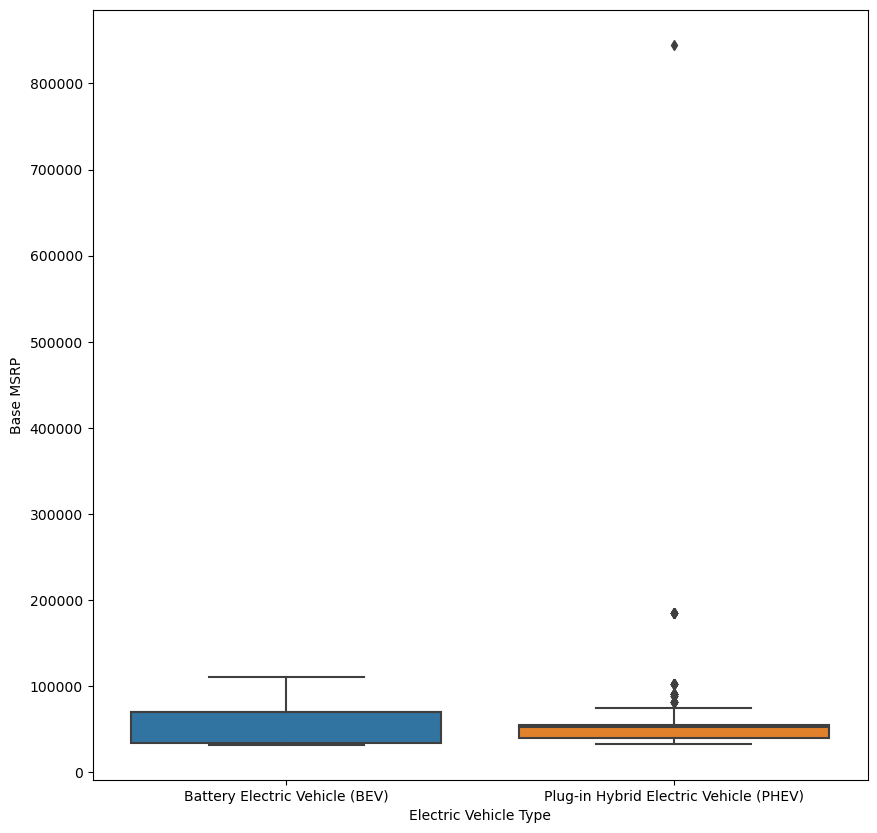

In [20]:
#Analyze the distribution of categorical variables and identify any anomalies or outliers
plt.figure(figsize=(10,10))
sns.boxplot(x = 'Electric Vehicle Type', y= 'Base MSRP' , data = new_df)

<Axes: xlabel='Base MSRP', ylabel='Make'>

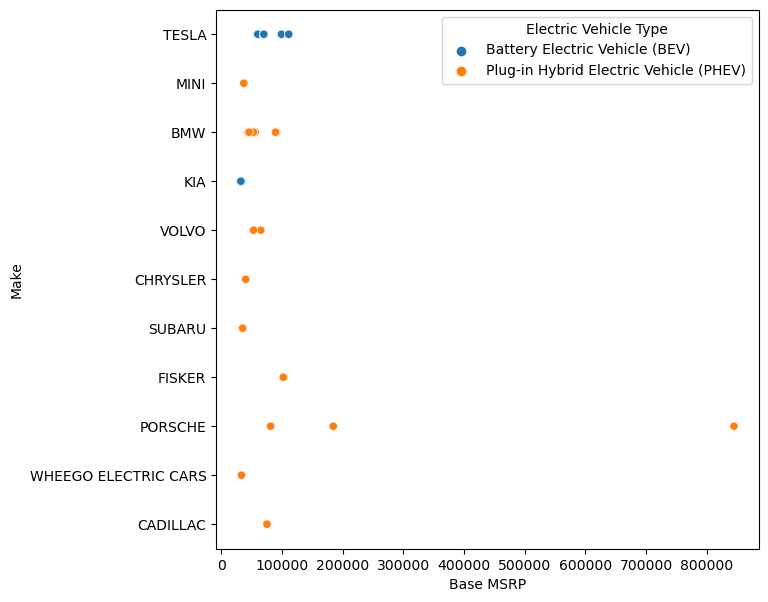

In [21]:
plt.figure(figsize=(7,7))
sns.scatterplot(data=new_df, x="Base MSRP", y="Make", hue="Electric Vehicle Type")

In [22]:
min_value = new_df['Base MSRP'].min()
q1, q3 = np. percentile(new_df[ 'Base MSRP'], [25,75])
median = new_df['Base MSRP'].median()
max_value = new_df['Base MSRP'].max
min_value, q1, q3, median, max_value

(31950.0,
 39995.0,
 69900.0,
 59900.0,
 <bound method NDFrame._add_numeric_operations.<locals>.max of 49        69900.0
 79        36900.0
 82        45600.0
 84        32250.0
 134       69900.0
            ...   
 134749    45600.0
 134756    69900.0
 134879    32250.0
 134955    31950.0
 135025    69900.0
 Name: Base MSRP, Length: 3419, dtype: float64>)

In [23]:
iqr = q3 - q1
Lower_boundry = q1 - 1.5*iqr
upper_boundry = q3 + 1.5*iqr
range = [Lower_boundry, upper_boundry]
range

[-4862.5, 114757.5]

In [24]:
new_df = new_df[ (new_df['Base MSRP'] > Lower_boundry) & (new_df['Base MSRP'] < upper_boundry)]
new_df

,Identifier,City,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
49,5YJSA1AGXD,Burien,98166.0,2013,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean alternative fuel vehicle eligible,208.0,69900.0,34.0,227099512,POINT (-122.34101999999996 47.46593000000007),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
79,WMZYU7C59K,Tacoma,98405.0,2019,MINI,COUNTRYMAN,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,12.0,36900.0,27.0,203153492,POINT (-122.45152999999999 47.25113500000003),BONNEVILLE POWER ADMINISTRATION||CITY OF TACOM...,5.305306e+10
82,WBA8E1C58J,Spanaway,98387.0,2018,BMW,330E,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,14.0,45600.0,29.0,129349279,POINT (-122.43511499999994 47.10450000000003),BONNEVILLE POWER ADMINISTRATION||CITY OF TACOM...,5.305307e+10
84,KNDJX3AE5H,Tacoma,98445.0,2017,KIA,SOUL EV,Battery Electric Vehicle (BEV),Clean alternative fuel vehicle eligible,93.0,32250.0,29.0,211099766,POINT (-122.40871999999996 47.16567500000008),BONNEVILLE POWER ADMINISTRATION||CITY OF TACOM...,5.305307e+10
134,5YJSA1DG6D,Woodinville,98072.0,2013,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean alternative fuel vehicle eligible,208.0,69900.0,45.0,106632725,POINT (-122.15166499999998 47.75855000000007),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303302e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134749,WBA8E1C56J,Maple Valley,98038.0,2018,BMW,330E,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,14.0,45600.0,5.0,349095113,POINT (-122.05190999999996 47.35798500000004),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
134756,5YJSA1CN0D,Auburn,98002.0,2013,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean alternative fuel vehicle eligible,208.0,69900.0,31.0,230284365,POINT (-122.22285499999998 47.30506500000007),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
134879,KNDJP3AE5H,Seattle,98178.0,2017,KIA,SOUL EV,Battery Electric Vehicle (BEV),Clean alternative fuel vehicle eligible,93.0,32250.0,37.0,295930995,POINT (-122.23438499999997 47.49454500000007),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
134955,KNDJP3AE4G,Tacoma,98445.0,2016,KIA,SOUL,Battery Electric Vehicle (BEV),Clean alternative fuel vehicle eligible,93.0,31950.0,25.0,5579794,POINT (-122.40871999999996 47.16567500000008),BONNEVILLE POWER ADMINISTRATION||CITY OF TACOM...,5.305307e+10


<Axes: xlabel='Base MSRP', ylabel='Model Year'>

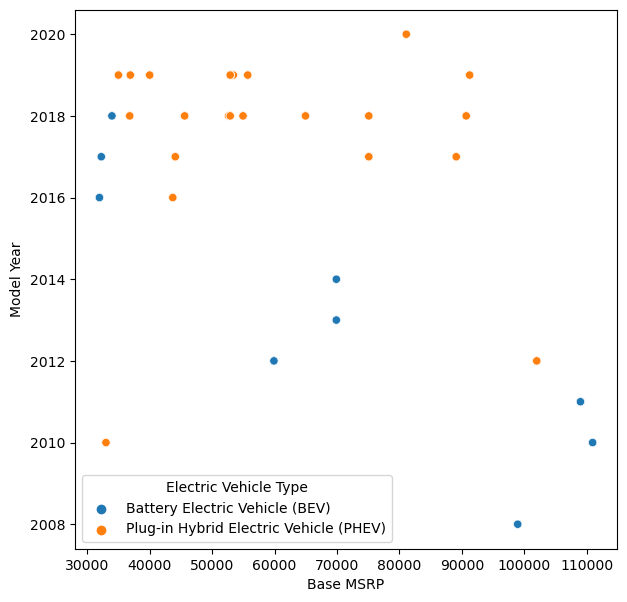

In [25]:
plt.figure(figsize=(7,7))
sns.scatterplot(data=new_df, x="Base MSRP", y="Model Year", hue="Electric Vehicle Type")

<Axes: xlabel='Electric Vehicle Type', ylabel='Base MSRP'>

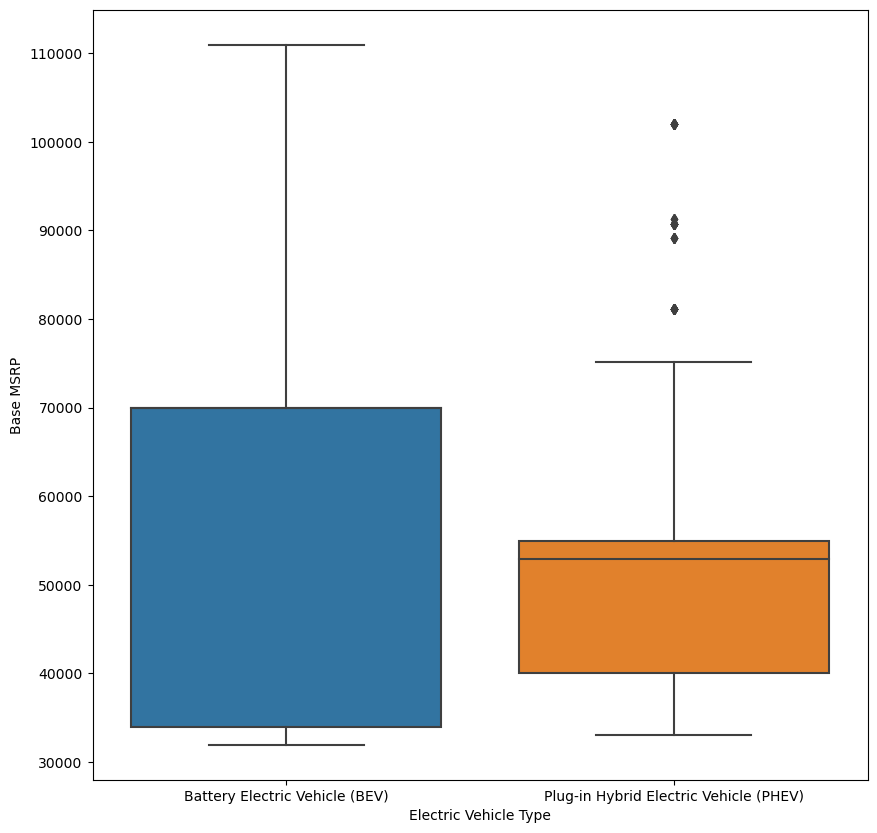

In [26]:
plt.figure(figsize=(10,10))
sns.boxplot(x = 'Electric Vehicle Type', y= 'Base MSRP' , data = new_df)

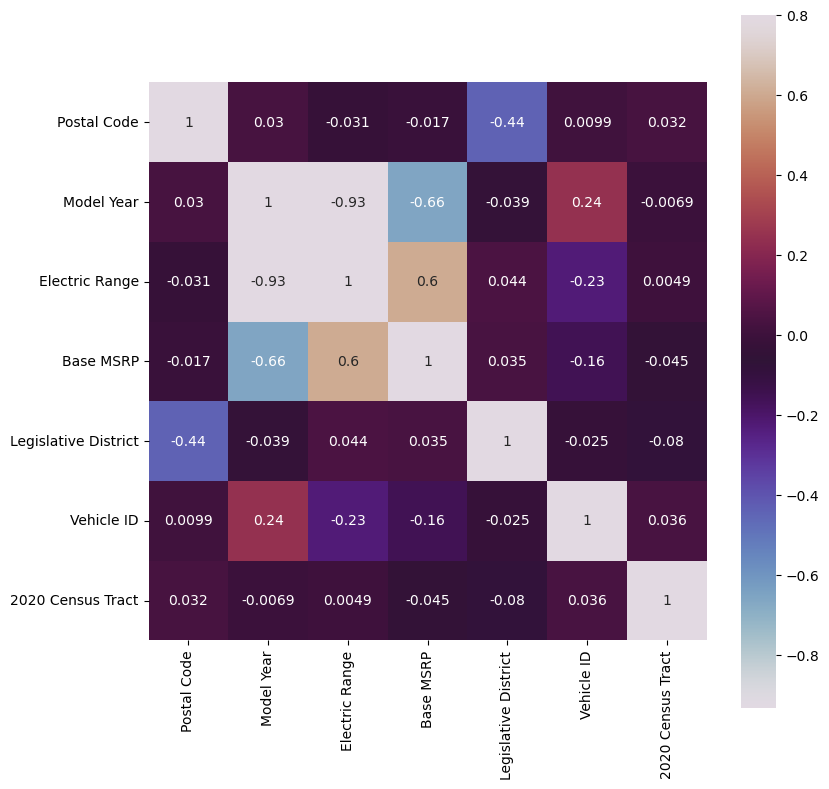

In [27]:
#correlation matrix
corrmat = new_df.corr()
f, ax = plt.subplots(figsize=(9, 9))
sns.heatmap(corrmat, vmax=.8, square=True, annot =True,cmap="twilight");

In [28]:
# Get columns that have are correlated to Base MSRP Base MSRP
new_df.get(['Model Year','Electric Vehicle Type','Electric Range','Base MSRP'])

,Model Year,Electric Vehicle Type,Electric Range,Base MSRP
49,2013,Battery Electric Vehicle (BEV),208.0,69900.0
79,2019,Plug-in Hybrid Electric Vehicle (PHEV),12.0,36900.0
82,2018,Plug-in Hybrid Electric Vehicle (PHEV),14.0,45600.0
84,2017,Battery Electric Vehicle (BEV),93.0,32250.0
134,2013,Battery Electric Vehicle (BEV),208.0,69900.0
...,...,...,...,...
134749,2018,Plug-in Hybrid Electric Vehicle (PHEV),14.0,45600.0
134756,2013,Battery Electric Vehicle (BEV),208.0,69900.0
134879,2017,Battery Electric Vehicle (BEV),93.0,32250.0
134955,2016,Battery Electric Vehicle (BEV),93.0,31950.0


In [29]:
Factors_df = new_df.get(['Model Year','Electric Vehicle Type','Electric Range','Base MSRP'])

In [30]:
#Transform categoric variables to Numeric using encoding 
# Import label encoder 
from sklearn import datasets
from sklearn import preprocessing 

In [31]:
#Change Electric vehicle type to numeric values 
label_encoder = preprocessing.LabelEncoder()
Factors_df['Electric Vehicle Type'] = label_encoder.fit_transform(Factors_df['Electric Vehicle Type']) 
Factors_df.head()

,Model Year,Electric Vehicle Type,Electric Range,Base MSRP
49,2013,0,208.0,69900.0
79,2019,1,12.0,36900.0
82,2018,1,14.0,45600.0
84,2017,0,93.0,32250.0
134,2013,0,208.0,69900.0


In [32]:
#Change Electric Model year to numeric values
Factors_df['Model Year'] = label_encoder.fit_transform(Factors_df['Model Year']) 
Factors_df

,Model Year,Electric Vehicle Type,Electric Range,Base MSRP
49,4,0,208.0,69900.0
79,9,1,12.0,36900.0
82,8,1,14.0,45600.0
84,7,0,93.0,32250.0
134,4,0,208.0,69900.0
...,...,...,...,...
134749,8,1,14.0,45600.0
134756,4,0,208.0,69900.0
134879,7,0,93.0,32250.0
134955,6,0,93.0,31950.0


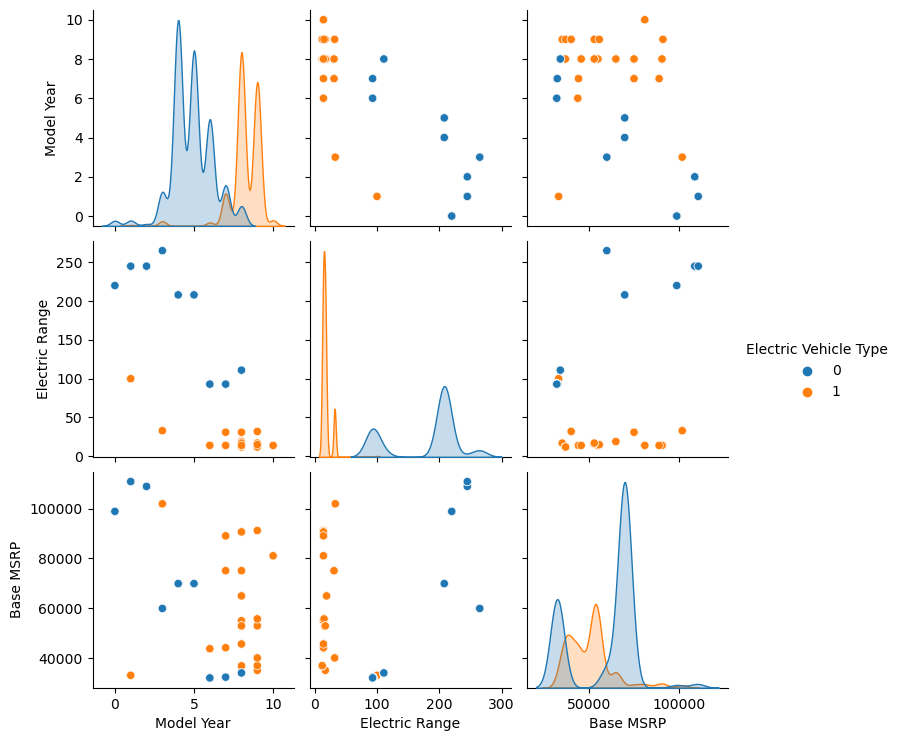

In [33]:
#Checking skewness of the factors 
import seaborn as sns

sns.pairplot(Factors_df, hue="Electric Vehicle Type", diag_kind="kde")

In [35]:
Factors_df.skew()

Model Year              -0.013073
Electric Vehicle Type    0.648883
Electric Range          -0.073702
Base MSRP                0.032024
dtype: float64